In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic  = sns.load_dataset('titanic')

In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic['pasclass'] = titanic['class']
def input_age(cols):
    age = cols[0]
    pasclass = cols[1]
    
    if pd.isnull(age):
        if pasclass ==1:
            return 37
        elif pasclass ==2:
            return 28
        else:
            return 24
    else:
        return age

In [6]:
titanic['age'] = titanic[['age','pasclass']].apply(input_age,axis = 1)

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
pasclass         0
dtype: int64

In [8]:
sex = {'male':0,'female':1}
titanic['sex'] = titanic['sex'].map(sex)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pasclass
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third


In [9]:
titanic[(titanic.survived==1)&(titanic.alive=="no")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pasclass


In [10]:
df3=titanic.drop(["deck","alive","pasclass"],axis=1)

In [11]:
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,True


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


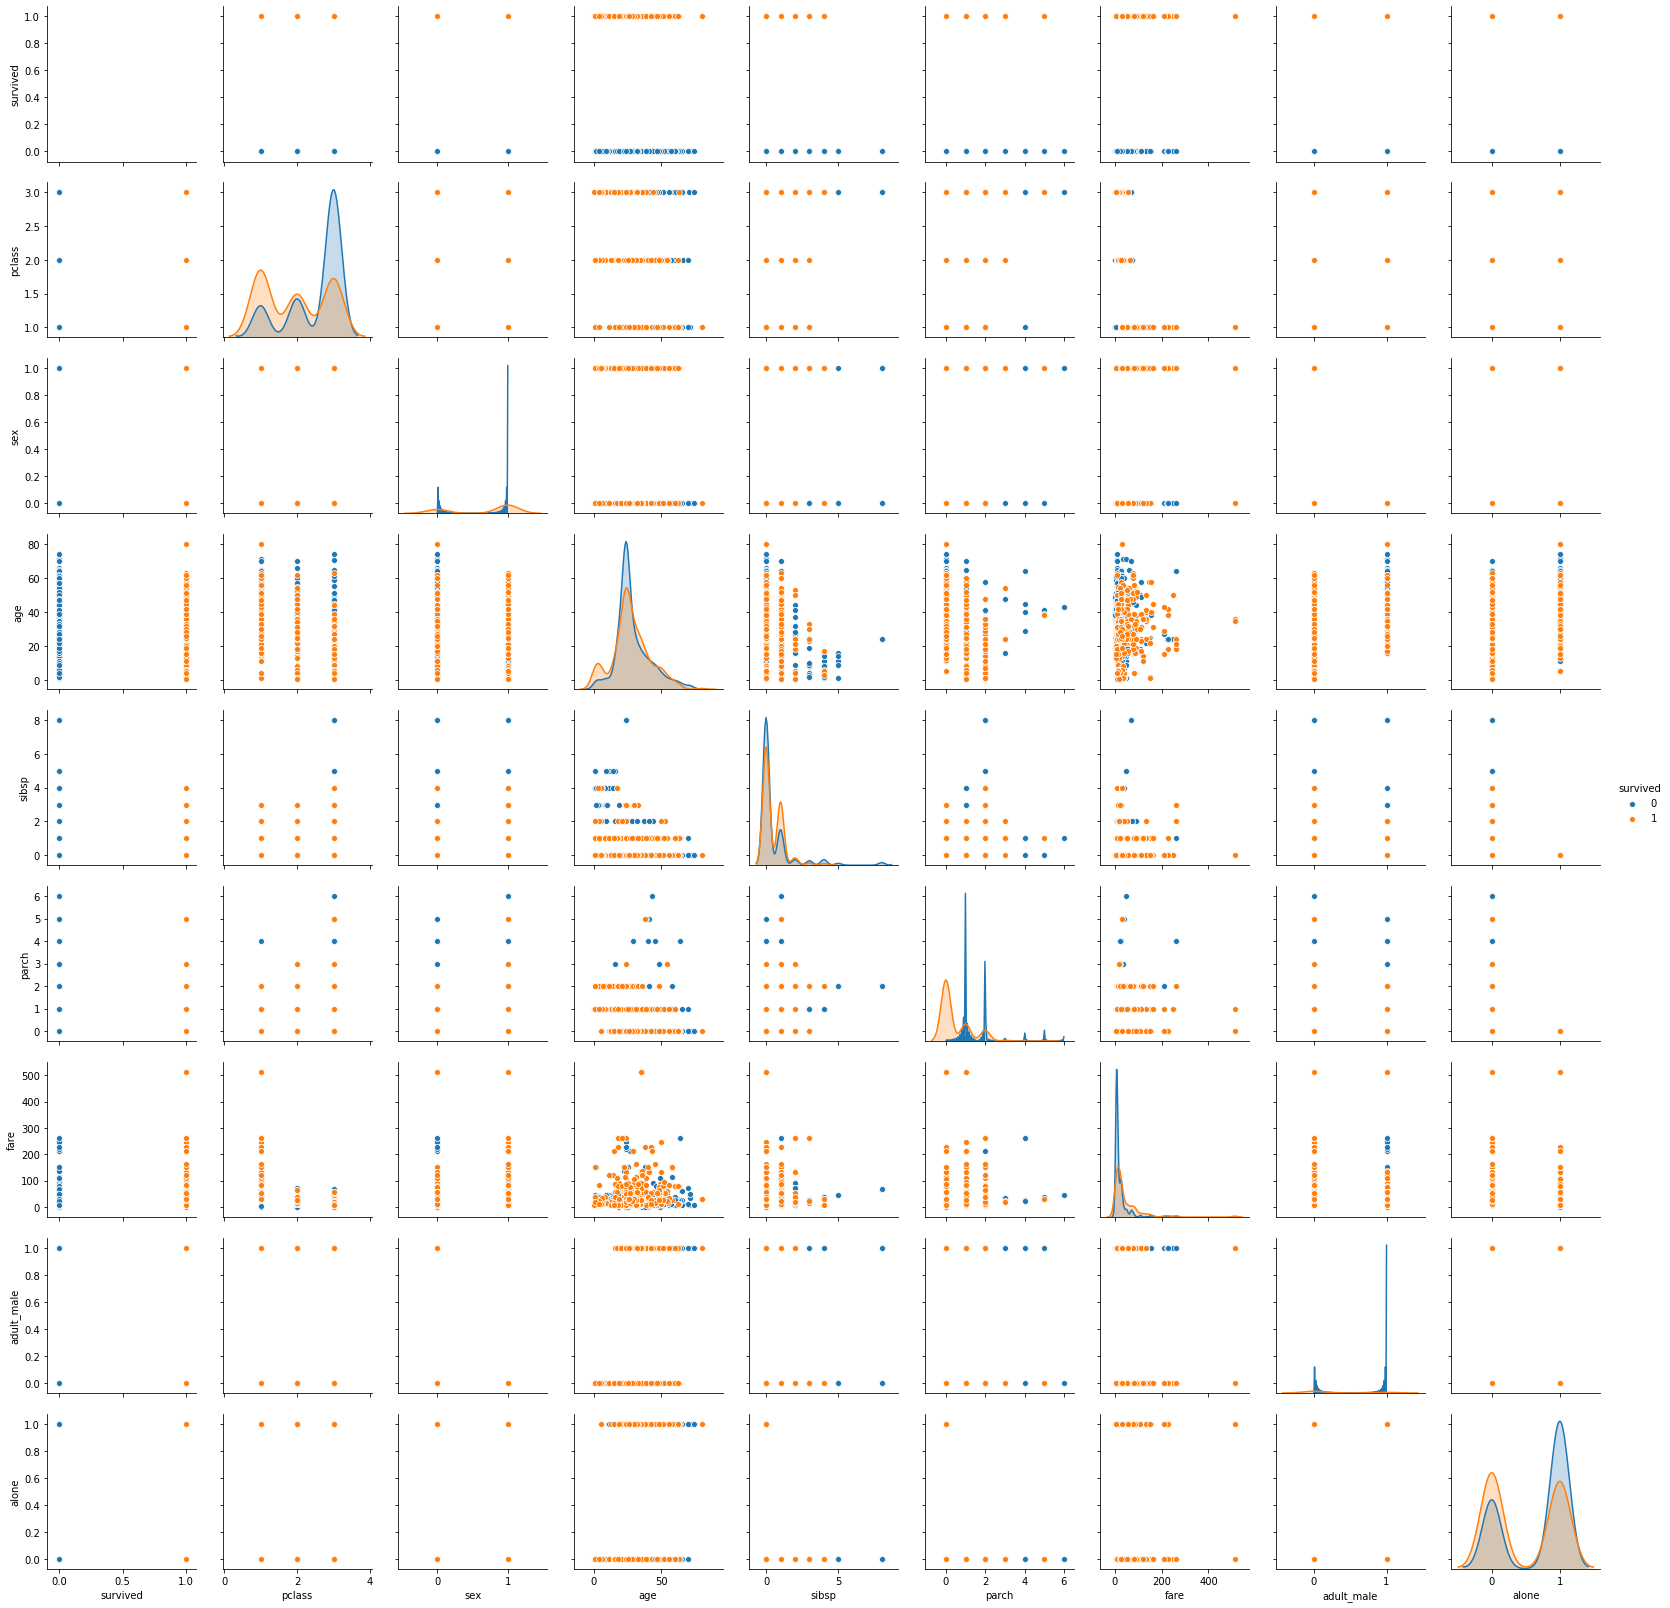

In [12]:
sns.pairplot(df3,hue="survived")

In [13]:
df3.corr().survived

survived      1.000000
pclass       -0.338481
sex           0.543351
age          -0.052872
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

## Here sex, adult_male and pclass are the most correlated variables with variable  survived

In [14]:
def predmod2(X,y,tsize):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    
    model=LogisticRegression() # creating an object
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=tsize)
    model_train=model.fit(X_train,y_train)
    pred=model_train.predict(X_test)
    
    coeff=model_train.coef_
    inter=model_train.intercept_
    
    con_mat=confusion_matrix(y_test,pred)
    acc=((con_mat[0][0]+con_mat[1][1])/len(y_test))*100
    err=100-acc
    
    r={"Accuracy":acc,"Error":err,"coefficient":coeff,"Intercept":inter}
    print(r)
    
    X_test["Actual"]=y_test
    X_test["Predicted"]=pred
    return X_test
    

In [15]:
X=df3[["sex","adult_male","parch"]]

In [16]:
y=df3["survived"]

In [17]:
predmod2(X,y,0.3)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Accuracy': 76.11940298507463, 'Error': 23.88059701492537, 'coefficient': array([[ 1.16071761, -1.84518688, -0.38612651]]), 'Intercept': array([0.13444786])}


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sex,adult_male,parch,Actual,Predicted
454,0,True,0,0,0
513,1,False,0,1,1
522,0,True,0,0,0
538,0,True,0,0,0
44,1,False,0,1,1
837,0,True,0,0,0
774,1,False,3,1,1
665,0,True,0,0,0
439,0,True,0,0,0
71,1,False,2,0,1


In [18]:
predmod2(X,y,0.15)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Accuracy': 73.13432835820896, 'Error': 26.86567164179104, 'coefficient': array([[ 0.73632328, -2.0843917 , -0.22308169]]), 'Intercept': array([0.45697297])}


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sex,adult_male,parch,Actual,Predicted
702,1,False,1,0,1
863,1,False,2,0,1
634,1,False,2,0,1
137,0,True,0,0,0
213,0,True,0,0,0
215,1,False,0,1,1
549,0,False,1,1,1
645,0,True,0,1,0
125,0,False,0,1,1
875,1,False,0,1,1


In [19]:
df4= predmod2(X,y,0.3)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Accuracy': 79.1044776119403, 'Error': 20.895522388059703, 'coefficient': array([[ 0.42113491, -2.25098018, -0.2363561 ]]), 'Intercept': array([0.75560555])}


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
df4.head()

,sex,adult_male,parch,Actual,Predicted
542,1,False,2,0,1
525,0,True,0,0,0
9,1,False,0,1,1
736,1,False,3,0,1
11,1,False,0,1,1


In [21]:
df4.to_excel(r'Titanic_survival_pred.xlsx', index = False)

In [22]:
df5=df4.drop(["sex","adult_male","parch"],axis=1)

In [23]:
df6= pd.concat([titanic, df5], axis=1, sort=False)

In [24]:
df6.shape

(891, 18)

In [25]:
df6=df6[df6.Actual.isnull()==False]

In [26]:
df6.shape

(268, 18)

In [27]:
df6.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pasclass,Actual,Predicted
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third,0.0,0.0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First,1.0,1.0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First,1.0,1.0
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third,0.0,0.0
6,0,1,0,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,First,0.0,0.0
7,0,3,0,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,Third,0.0,1.0
9,1,2,1,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,Second,1.0,1.0
11,1,1,1,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,First,1.0,1.0
13,0,3,0,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,Third,0.0,0.0
19,1,3,1,24.0,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,Third,1.0,1.0


In [28]:
df6.to_excel(r"Titanic_sur_final.xlsx",index=False)